In [38]:
# import imaplib
# import os
# import email
# import matplotlib.pyplot as plt

# EMAIL_DATASET_PATH = os.path.join(os.getcwd(), 'emails')
# if not os.path.exists(EMAIL_DATASET_PATH):
#     os.mkdir(EMAIL_DATASET_PATH)
# mail = imaplib.IMAP4_SSL('imap.gmail.com')
# # imaplib module implements connection based on IMAPv4 protocol
# mail.login("asfinavayani1@gmail.com", "V@yani1995")
# # >> ('OK', [username at gmail.com Vineet authenticated (Success)'])

In [55]:
import imaplib
import os
import email
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
EMAIL_DATASET_PATH = os.path.join(os.getcwd(), 'emails')

In [40]:
# mail.list() # Lists all labels in GMail
# mail.select('inbox') # Connected to inbox.

In [41]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [42]:
# result, data = mail.uid('search', None, "ALL")
# # search and return uids instead
# i = len(data[0].split()) # data[0] is a space separate string
# for x in range(i):
#     latest_email_uid = data[0].split()[x] # unique ids wrt label selected
#     result, email_data = mail.uid('fetch', latest_email_uid, '(RFC822)')
#     # fetch the email body (RFC822) for the given ID
#     raw_email = email_data[0][1]

#     #continue inside the same for loop as above
#     raw_email_string = raw_email.decode('utf-8')

#     # converts byte literal to string removing b''
#     email_message = email.message_from_string(raw_email_string)
#     subject = email_message['Subject']
#     print(subject)

#     # this will loop through all the available multiparts in mail
#     for part in email_message.walk():
#         if part.get_content_type() == "text/plain": # ignore attachments/html
#             body = part.get_payload(decode=True)
#             try:
#               content = body.decode('utf-8')
#               formatted = content.replace('\r', '').replace('\n', ' ')
#               formatted = re.sub('[^ ]+\.[^ ]+','',formatted)
#               formatted = formatted + " " + subject
#               print(formatted)
#               save_string = str("email_" + str(x) + ".eml")
#               with open(os.path.join(EMAIL_DATASET_PATH, save_string), 'a') as file:
#                   file.write(formatted)
#                   print(str(x) + ' email is saved')
#             except Exception as err:
#               print(err)

#         else:
#          continue
#     # break
        
#     # if x == 9000:
#     #     break

In [43]:
# filedata = ''

# for emailpath in os.listdir(EMAIL_DATASET_PATH):
#     with open(os.path.join(EMAIL_DATASET_PATH, emailpath), 'r') as file:
#         lines = file.readlines()
#         for line in lines:
#             filedata+=line
# print('Processed!!')

In [44]:
import pandas as pd


In [45]:
df = pd.DataFrame(columns=['content'])
counter = 0
for emailpath in os.listdir(EMAIL_DATASET_PATH):
    with open(os.path.join(EMAIL_DATASET_PATH, emailpath), 'r') as file:
        lines = file.readlines()
        df.loc[counter,"content"] = lines[0]
        counter +=1
#         for line in lines:
#             filedata+=line
print('Processed!!')

Processed!!


In [46]:
df.head()

,content
0,[image: Google] Recovery phone was changed ...
1,"*Your Services Agreement made clearer* Hello,..."
2,Here are the newest videos from each of your s...
3,"Hey Asfina, Welcome to Google+ - were glad yo..."
4,Here are the newest videos from each of your s...


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [48]:
#ltk.download()

In [49]:
nltk.download('stopwords')
##Remove stopwords (does not contribute much in sentence)
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/hb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def clean_text(text):
    text = text.replace('[image: Google]', '')
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    tokens = [word.lower() for word in tokens]
    text = [word for word in tokens if word not in stopword]
    text = [word for word in text if len(word) > 1]
    
    return text


In [51]:
df['clean'] = df['content'].apply(lambda x: clean_text(x))

In [52]:
df.head()

,content,clean
0,[image: Google] Recovery phone was changed ...,"[recovery, phone, changed, recovery, phone, ac..."
1,"*Your Services Agreement made clearer* Hello,...","[services, agreement, made, clearer, hello, re..."
2,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
3,"Hey Asfina, Welcome to Google+ - were glad yo...","[hey, asfina, welcome, google, glad, youre, he..."
4,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."


In [53]:
df

,content,clean
0,[image: Google] Recovery phone was changed ...,"[recovery, phone, changed, recovery, phone, ac..."
1,"*Your Services Agreement made clearer* Hello,...","[services, agreement, made, clearer, hello, re..."
2,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
3,"Hey Asfina, Welcome to Google+ - were glad yo...","[hey, asfina, welcome, google, glad, youre, he..."
4,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
5,"Thank You Again, asfina! You now have access ...","[thank, asfina, access, shipment, samples, com..."
6,Hi Welcome to your free trial of Music Premi...,"[hi, welcome, free, trial, music, premium, mem..."
7,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
8,Your account is listed as the recovery email ...,"[account, listed, recovery, email, dont, recog..."
9,"Asfina, heres your 2019 Timeline update Youre...","[asfina, heres, 2019, timeline, update, youre,..."


In [56]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer=clean_text)

In [57]:
data_matrix=vectorizer.fit_transform(df['content'])
print("\n Feature names Identified :\n")
# print(vectorizer.get_feature_names())


 Feature names Identified :



In [58]:
data_matrix.shape

(180, 2748)

In [60]:
num_of_topic = 8

In [61]:
lda = LatentDirichletAllocation(
        n_components=num_of_topic, max_iter=5, 
        learning_method='online', random_state=0)
lda_mat = lda.fit_transform(data_matrix)

In [62]:
lda_mat.shape

(180, 8)

In [65]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


1processed
2processed
3processed
4processed
5processed
6processed
7processed
8processed
9processed
10processed
11processed
12processed
13processed
14processed
15processed
16processed
17processed
18processed
19processed
20processed
21processed
22processed
23processed
24processed
25processed
26processed
27processed
28processed
29processed
30processed
31processed
32processed
33processed
34processed
35processed
36processed
37processed
38processed
39processed
40processed
41processed
42processed
43processed
44processed
45processed
46processed
47processed
48processed
49processed
Sum of squared distances :  [92.9510805111887, 55.527541108135836, 29.156438621889194, 14.681295185719934, 6.55347182346963, 3.119086457874558, 1.9021135935529019, 1.0188200181828404, 0.7930826972840136, 0.5765101735750248, 0.4001615354114487, 0.23756841633482262, 0.12826214845352468, 0.06189967026984765, 0.05185742968587013, 0.044502698661582324, 0.03882929393619326, 0.034096818941730625, 0.02865946091178552, 0.02548

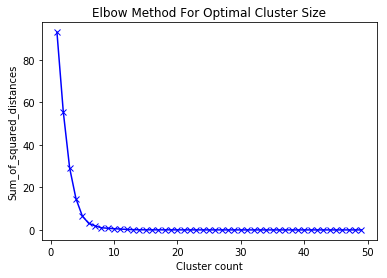

In [67]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
#     km = km.fit(data_matrix)
    km = km.fit(lda_mat)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [68]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=8).fit(data_matrix)

#get Cluster labels.
clusters=kmeans.labels_

In [69]:
df['cluster'] = clusters

In [70]:
df[df['cluster'] == 1]

,content,clean,cluster
12,📩 Missing Some Money? 📩Did you know there may...,"[missing, money, know, may, unclaimed, funds, ...",1
26,Product Test #343: APPLE ®IPHONE XS Please...,"[product, test, 343, apple, iphone, xs, please...",1
27,SPECIAL OFFER! Product Testing Offer - Coca-C...,"[special, offer, product, testing, offer, coca...",1
34,Product Test #299: Beats Solo 3 Wireless Plea...,"[product, test, 299, beats, solo, wireless, pl...",1
39,Pending Confirmation → APPROVED: Your off...,"[pending, confirmation, approved, offer, waiti...",1
51,"Hi, Confirm Your Sweepstakes Account OPEN...","[hi, confirm, sweepstakes, account, open, ente...",1
56,FUNDS INFORMATION → OPEN ME ← Did you know m...,"[funds, information, open, know, millions, ame...",1
75,Pending Confirmation → APPROVED: Your off...,"[pending, confirmation, approved, offer, waiti...",1
83,☟ Your bank account options ☟ Is your bank lo...,"[bank, account, options, bank, looking, youmay...",1
86,"MAC: Order Confirmation for asfina asfina, pl...","[mac, order, confirmation, asfina, asfina, ple...",1



Group :  0 
-------------------


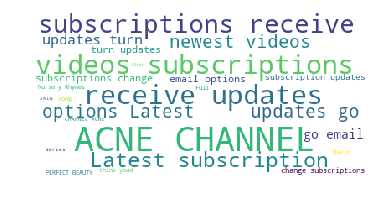


Group :  1 
-------------------


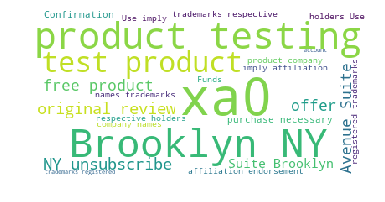


Group :  2 
-------------------


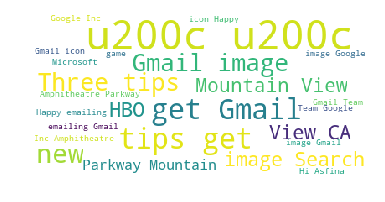


Group :  3 
-------------------


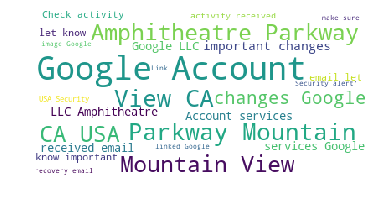


Group :  4 
-------------------


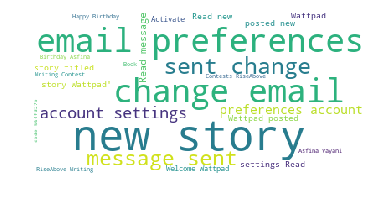


Group :  5 
-------------------


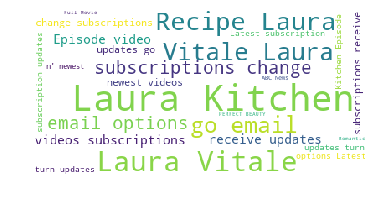


Group :  6 
-------------------


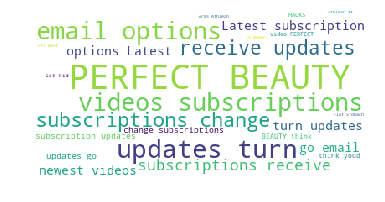


Group :  7 
-------------------


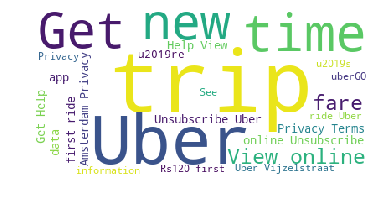

In [71]:
#Print cluster label and Courses under each cluster
from wordcloud import WordCloud
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")

    #Generate wordcloud data
    wordcloud = WordCloud(stopwords=stopword, max_words=25, \
                      background_color="white").generate(str(df[df['cluster'] == group]['content'].values))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [73]:
def build_lda(x_train, num_of_topic=7):
    vec = TfidfVectorizer(stop_words='english', analyzer=clean_text)
    transformed_x_train = vec.fit_transform(x_train)
    feature_names = vec.get_feature_names()
    
    lda = LatentDirichletAllocation(
        n_components=num_of_topic, max_iter=5, 
        learning_method='online', random_state=0)
    lda.fit(transformed_x_train)
    return lda, vec, feature_names

In [32]:
def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)

In [33]:
lda_model, vec, feature_names = build_lda(df['content'], 8)
display_word_distribution(
    model=lda_model, feature_names=feature_names, 
    n_word=10)

Topic 0:
['uber', 'google', 'wattpad', 'read', 'story', 'account', 'new', 'updates', 'acne', 'ride']
Topic 1:
['rides', 'get', 'dubsmash', 'uber', 'first', '100', 'happy', 'confirmation', '1017', 'dubbing']
Topic 2:
['product', 'hbo', 'test', 'selected', 'original', 'trademarks', 'testing', 'free', 'beats', 'please']
Topic 3:
['asfina', 'accepted', 'max', 'payment', 'accept', 'list', 'collect', 'account', 'database', '63150']
Topic 4:
['asfina', 'accepted', 'max', 'accept', 'mac', 'payment', 'order', 'collect', 'sent', 'wattpad']
Topic 5:
['updates', 'laura', 'subscriptions', 'beauty', 'kitchen', 'perfect', 'videos', 'turn', 'latest', 'newest']
Topic 6:
['google', 'account', 'important', 'check', 'signed', 'let', 'changes', 'alert', 'services', 'activity']
Topic 7:
['dream', 'talkies', 'salman', 'khan', 'malhotra', 'marriage', 'abp', 'updates', 'perfect', 'ambanis']


In [34]:
custom_data = ["Password reset requested for your Google Account"]

custom_matrix=vectorizer.transform(custom_data)

In [35]:
custom_matrix.shape

(1, 2748)

In [36]:
a = kmeans.predict(custom_matrix)

In [37]:
a

array([1], dtype=int32)